- https://github.com/AstraZeneca/skywalkR-graph-features

> KR4SL: knowledge graph reasoning for explainable prediction of synthetic lethality 
> - https://doi.org/10.1093/bioinformatics/btad261

- https://github.com/mims-harvard/PrimeKG#dataloader-therapeutics-data-commons

- https://tdcommons.ai/multi_pred_tasks/ppi/

___

List drug names:
- PARP INHIBITOR
    - Olaparib
- ATM INHIBITOR
    - AZD0156
- ATR INHIBITOR
    - AZD6738
- WEE1 INHIBITOR
    - AZD1775
- DNA-PK INHIBITOR
    - AZD7648

In [9]:
drug_names = {
    'Pi': 'PARPi',
    'Ri': 'ATRi',
    'Wi': 'WEE1i',
    'Mi': 'ATMi',
    'Ki': 'DNAPKi',
    'PiRi': 'PARPi+ATRi',
    'PiWi': 'PARPi+WEE1i',
    'PiMi': 'PARPi+ATMi',
    'PiKi': 'PARPi+DNAPKi'
}

In [1]:
import numpy as np 
import pandas as pd
import anndata as ad
import screenpro as scp

from screenpro.load import loadScreenProcessingData

In [2]:
# import sys
# sys.path.append("/data_gilbert/home/aarab/FunGI")
# from search import *

In [89]:
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm
from matplotlib import rcParams

import matplotlib

matplotlib.use('cairo')

font_files = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# {f.name for f in matplotlib.font_manager.fontManager.ttflist}

rcParams['font.sans-serif'] = 'Helvetica'
rcParams['font.family'] = ['Helvetica']


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

### Get phenotype scores

In [5]:
screen = scp.load._read_screen_pkl('A549_CRISPRi_screens')

### Build a single KG

https://github.com/abearab/DDRi/issues/3

In [6]:
from tdc.utils.knowledge_graph import KnowledgeGraph, build_KG

In [7]:
screen.listPhenotypeScores(run_name='compare_guides')

['gamma:DMSO_vs_T0',
 'tau:Pi_vs_T0',
 'rho:Pi_vs_DMSO',
 'tau:Ri_vs_T0',
 'rho:Ri_vs_DMSO',
 'tau:PiRi_vs_T0',
 'rho:PiRi_vs_DMSO',
 'tau:Mi_vs_T0',
 'rho:Mi_vs_DMSO',
 'tau:PiMi_vs_T0',
 'rho:PiMi_vs_DMSO',
 'tau:Wi_vs_T0',
 'rho:Wi_vs_DMSO',
 'tau:PiWi_vs_T0',
 'rho:PiWi_vs_DMSO',
 'tau:Ki_vs_T0',
 'rho:Ki_vs_DMSO',
 'tau:PiKi_vs_T0',
 'rho:PiKi_vs_DMSO']

In [10]:
def getTreatmentKG(screen,treatment,perturbation, drug_names=drug_names,threshold=6):
    
    df = screen.getPhenotypeScores(
        run_name='compare_guides',
        phenotype_name=f'rho:{treatment}_vs_DMSO',
        threshold=threshold,
        pvalue_col = 'ttest pvalue'
    )    
        
    df = df[['target','label']].query('label not in ["target_non_hit","negative_control"]').reset_index(drop=True)
    
    kg = build_KG(
        indices = df.index,# a list to assign row names of output data frame
        relation = perturbation, # a list or string to assign values
        display_relation= df.label,# a list or string to assign values

        x_id = drug_names[treatment],# a list or string to assign values
        x_type = 'Drug',# a list or string to assign values
        x_name = drug_names[treatment],# a list or string to assign values
        x_source = 'AstraZeneca',# a list or string to assign values

        y_id = df.target,# a list or string to assign values
        y_type = 'gene',# a list or string to assign values
        y_name = df.target,# a list or string to assign values
        y_source = 'NCBI'# a list or string to assign values
    )
    
    return kg

In [11]:
pd.concat([
    getTreatmentKG(screen,treatment=t,perturbation='A549_CRISPRi').df 
    for t in list(drug_names.keys())
]).reset_index(drop=True)

,relation,display_relation,x_id,x_type,x_name,x_source,y_id,y_type,y_name,y_source
0,A549_CRISPRi,sensitivity_hit,PARPi,Drug,PARPi,AstraZeneca,ACTL7A,gene,ACTL7A,NCBI
1,A549_CRISPRi,resistance_hit,PARPi,Drug,PARPi,AstraZeneca,ACTR3,gene,ACTR3,NCBI
2,A549_CRISPRi,resistance_hit,PARPi,Drug,PARPi,AstraZeneca,ALB,gene,ALB,NCBI
3,A549_CRISPRi,resistance_hit,PARPi,Drug,PARPi,AstraZeneca,ALG1,gene,ALG1,NCBI
4,A549_CRISPRi,resistance_hit,PARPi,Drug,PARPi,AstraZeneca,ALG8,gene,ALG8,NCBI
...,...,...,...,...,...,...,...,...,...,...
5248,A549_CRISPRi,sensitivity_hit,PARPi+DNAPKi,Drug,PARPi+DNAPKi,AstraZeneca,ZNHIT6,gene,ZNHIT6,NCBI
5249,A549_CRISPRi,resistance_hit,PARPi+DNAPKi,Drug,PARPi+DNAPKi,AstraZeneca,ZRANB2,gene,ZRANB2,NCBI
5250,A549_CRISPRi,resistance_hit,PARPi+DNAPKi,Drug,PARPi+DNAPKi,AstraZeneca,ZRSR2,gene,ZRSR2,NCBI
5251,A549_CRISPRi,sensitivity_hit,PARPi+DNAPKi,Drug,PARPi+DNAPKi,AstraZeneca,ZSWIM8,gene,ZSWIM8,NCBI


In [12]:
DDRi_screens_A549_CRISPRi_kg = pd.concat([
    getTreatmentKG(screen,treatment=t,perturbation='A549_CRISPRi').df 
    for t in list(drug_names.keys())
]).reset_index(drop=True)

DDRi_screens_A549_CRISPRi_kg = KnowledgeGraph(DDRi_screens_A549_CRISPRi_kg)

In [13]:
# Ca_A549_kg = pd.concat([
#     getTreatmentKG(Ca_A549,treatment=t,perturbation='A549_CRISPRa',rep_name='Rep1').df
#     for t in list(Ca_A549.comparisons.keys())
# ]).reset_index(drop=True)

# Ca_k562_kg = pd.concat([
#     getTreatmentKG(Ca_k562,treatment=t,perturbation='K562_CRISPRa').df
#     for t in list(Ca_k562.comparisons.keys())
# ]).reset_index(drop=True)

In [14]:
# DDRi_screens_kg = pd.concat([
#     Ci_kg,
#     Ca_A549_kg,
#     Ca_k562_kg,
# ]).reset_index(drop=True)

# DDRi_screens_kg = KnowledgeGraph(DDRi_screens_kg)

In [15]:
# DDRi_screens_kg.df.to_csv('DDRi_screens_kg.csv',index=False)

___

In [16]:
# DDRi_screens_A549_CRISPRi_kg = DDRi_screens_kg.copy()

# DDRi_screens_A549_CRISPRi_kg.run_query('relation=="A549_CRISPRi"')

# DDRi_screens_A549_CRISPRi_kg.df.to_csv('DDRi_screens_A549_CRISPRi_kg.csv',index=False)

___

In [17]:
DDRi_screens_rho_sen_kg = DDRi_screens_A549_CRISPRi_kg.copy()

DDRi_screens_rho_sen_kg.run_query('display_relation=="sensitivity_hit"')

### Annotated graph to highlight PRDX1

- color `edge` by rho score direction 
- weight`edge` by rho score values
- circle gene `nodes` and square treatment nodes
- size gene `nodes` give a confidence value from the p-values
    - maybe average of `-log10(p-values)`
    - https://stats.stackexchange.com/questions/78596/when-combining-p-values-why-not-just-averaging
- export data for cytoscape visualization

#### 
https://github.com/cytoscape/py2cytoscape

In [18]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

In [19]:
def build_graph(kg,verbose=True):

    gr = ig.Graph.TupleList(
        kg.df[['x_id','y_id']].itertuples(index=False), 
        directed=False, weights=False
    )
    
    gr.vs['nodeType'] = [
        'drug' if node in kg.df.x_name.unique() else 'gene' 
        for node in gr.vs['name']
    ]
    
    if verbose: get_graph_features(gr)
    
    return gr

In [84]:
def plot_betweenness(g, ax, cax1, cax2, d_thr = 9):
    '''Plot vertex/edge betweenness, with colorbars

    Args:
        g: the graph to plot.
        ax: the Axes for the graph
        cax1: the Axes for the vertex betweenness colorbar
        cax2: the Axes for the edge betweenness colorbar
    '''
    vertex_betweenness = g.betweenness()
    edge_betweenness = g.edge_betweenness()

    # Rescale betweenness to be between 0.0 and 1.0
    scaled_vertex_betweenness = ig.rescale(vertex_betweenness, clamp=True)
    scaled_edge_betweenness = ig.rescale(edge_betweenness, clamp=True)
    print(f"vertices: {min(vertex_betweenness)} - {max(vertex_betweenness)}")
    print(f"edges: {min(edge_betweenness)} - {max(edge_betweenness)}")

    # Define mappings betweenness -> color
    cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["pink", "indigo"])
    cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

    # Plot graph
    g.vs["color"] = [cmap1(betweenness) for betweenness in scaled_vertex_betweenness]

    g.vs["frame_color"] = [
        'red' if d >= d_thr and nType != 'drug' else 'black' for d,nType in zip(g.vs.degree(),g.vs['nodeType'])
    ]
    
    # frame_colors = []
    # for d,name,nType in zip(g.vs.degree(),g.vs['name'], g.vs['nodeType']):
    #     if d >= d_thr and nType != 'drug':
    #         frame_colors.append('red')
    #     elif d < d_thr and nType != 'drug':
    #         frame_colors.append('black')
    #     elif '+' in name and nType == 'drug':
    #         frame_colors.append('green')
    #     else:
    #         frame_colors.append('blue')
            
    # g.vs["frame_color"] = frame_colors
    
    
    g.vs["frame_width"] = [
        3 if d >= d_thr and nType != 'drug' else 1 for d,nType in zip(g.vs.degree(),g.vs['nodeType'])
    ]
    
    s_scale = 2
    g.vs["size"]  = [20 * s_scale if d > 10 else d * s_scale for d in g.vs.degree()]
    g.vs['shape'] = ['rectangle' if nType is 'drug' else 'circle' for nType in gr.vs['nodeType']]
    g.vs['label'] = [name if d > 10 else '' for d,name in zip(g.vs.degree(), g.vs['name'])]

    g.es["size"] = [betweenness for betweenness in scaled_edge_betweenness]
    g.es["color"] = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]
    g.es["width"] = ig.rescale(edge_betweenness, (0.5, 1.0))

    # g.layout_fruchterman_reingold(niter=10000)
    # g.layout_reingold_tilford_circular(mode='in')
    
    ig.plot(
        g,
        target=ax,
        layout="fruchterman_reingold",
        keep_aspect_ratio=True,
    )

    # Color bars
    norm1 = ScalarMappable(norm=Normalize(0, max(vertex_betweenness)), cmap=cmap1)
    norm2 = ScalarMappable(norm=Normalize(0, max(edge_betweenness)), cmap=cmap2)
    plt.colorbar(norm1, cax=cax1, orientation="horizontal", label='Vertex Betweenness')
    plt.colorbar(norm2, cax=cax2, orientation="horizontal", label='Edge Betweenness')
    
    return g

def get_graph_features(g, out=None):
    print(g.summary(), '\n')
    print("Number of vertices in the graph:", g.vcount())
    print("Number of edges in the graph", g.ecount())
    print("Is the graph directed:", g.is_directed())
    print("Maximum degree in the graph:", g.maxdegree())

    top_nodes = g.vs.select(_degree=g.maxdegree())["name"]
    print("Node name with Maximum degree:", top_nodes)


In [76]:
gr0 = build_graph(DDRi_screens_rho_sen_kg)

IGRAPH UN-- 1609 3630 -- 
+ attr: name (v), nodeType (v) 

Number of vertices in the graph: 1609
Number of edges in the graph 3630
Is the graph directed: False
Maximum degree in the graph: 625
Node name with Maximum degree: ['DNAPKi']


In [77]:
gr1 = gr0.copy()

## filter by degree
# https://codereview.stackexchange.com/questions/284246/deletion-of-nodes-of-degree-1-from-a-python-igraph-graph
gr1.delete_vertices({v for v in gr1.vs.select(_degree_le=2)})

get_graph_features(gr1)

IGRAPH UN-- 519 2177 -- 
+ attr: name (v), nodeType (v) 

Number of vertices in the graph: 519
Number of edges in the graph 2177
Is the graph directed: False
Maximum degree in the graph: 376
Node name with Maximum degree: ['PARPi+DNAPKi']


In [78]:
gr = gr1.copy()

# gr = gr.es.subgraph([
#     (e < pd.Series(gr1.edge_betweenness()).quantile(.1)) |
#     (e > pd.Series(gr1.edge_betweenness()).quantile(.9)) 
#     for e in gr.edge_betweenness()
# ])

In [79]:
[n for d,n in zip(gr.degree(),gr.vs['name']) if d >= 9 and 'i' not in n]

['CDK12', 'MCPH1', 'PRDX1', 'RAD9A', 'RFC5', 'XRCC3']

In [80]:
gr = gr.simplify()

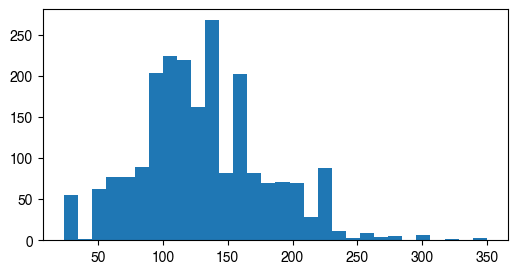

In [81]:
%matplotlib inline 
plt.figure(figsize=(6, 3))
plt.hist(gr.edge_betweenness(),bins=30)
plt.show()

vertices: 2.1575924733178593 - 33024.705528851664
edges: 23.805077642067232 - 349.7774243119934


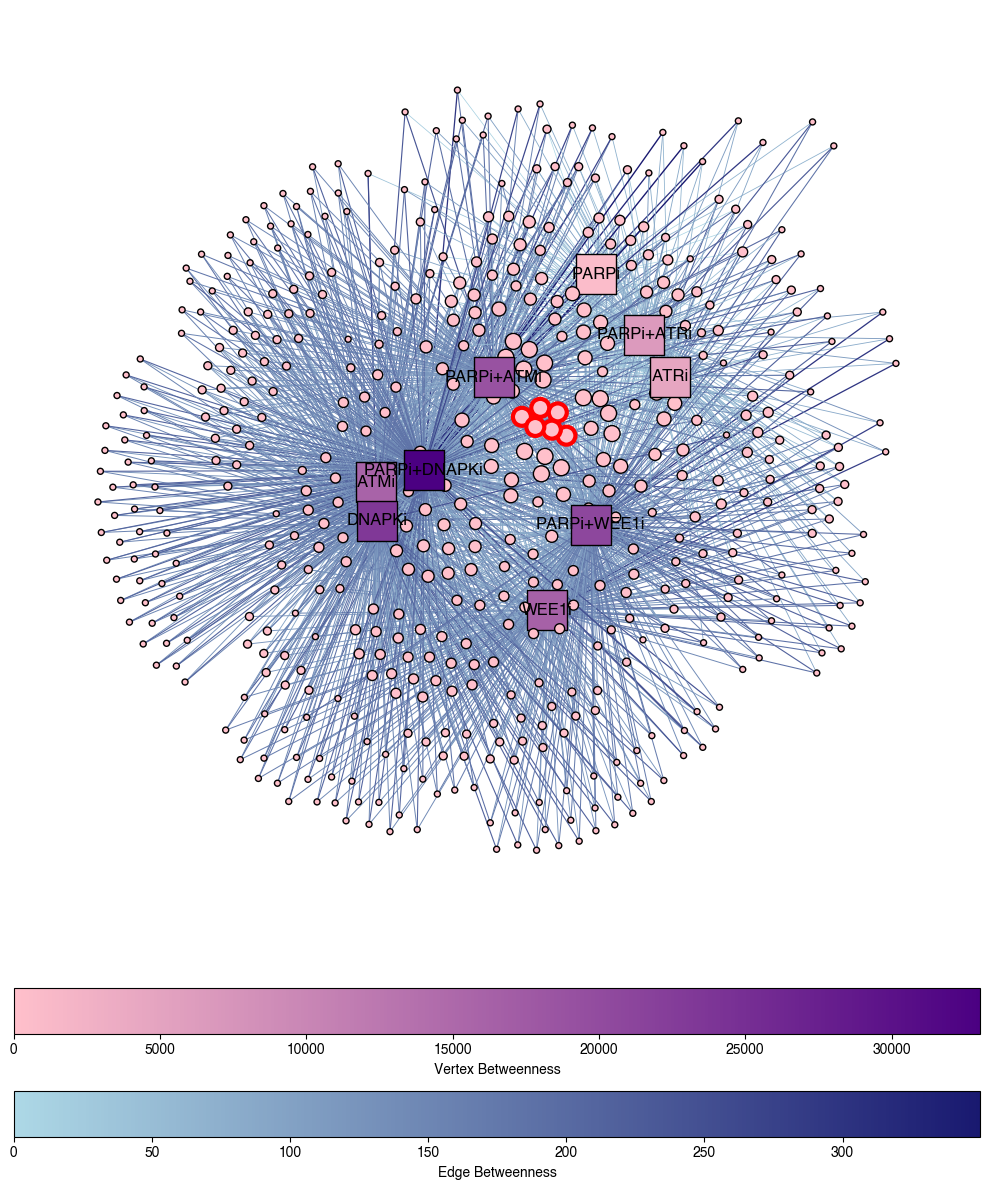

In [91]:
%matplotlib inline 
fig, axs = plt.subplots(
    3, 1,
    figsize=(10, 12),
    gridspec_kw={"height_ratios": (20, 1, 1)},
)

gr_plot = plot_betweenness(gr, *axs)

fig.tight_layout(h_pad=1)
plt.savefig("Fig-2C.pdf")
plt.show()

In [50]:
# # cyto = ig.drawing.graph.CytoscapeGraphDrawer()

# # cyto.draw(graph=gr_plot)

# from pyvis.network import Network

# nt = Network('500px', '500px',notebook=True)

In [51]:
# nt.from_nx(gr_plot.to_networkx())

In [52]:
# nt.show('test.html')

# 

In [53]:
from watermark import watermark
print(
    watermark()
)

Last updated: 2024-08-15T03:58:29.683648-07:00

Python implementation: CPython
Python version       : 3.9.19
IPython version      : 8.18.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.0-117-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit



In [54]:
print(
    watermark(iversions=True, globals_=globals())
)

matplotlib: 3.6.3
pandas    : 2.1.4
igraph    : 0.11.5
screenpro : 0.4.12
anndata   : 0.10.7
numpy     : 1.26.4



___